In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pylab as plt
import matplotlib as mpl

In [2]:
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

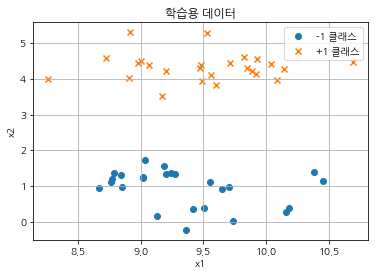

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y= 2*y -1

plt.scatter(X[y== -1, 0], X[ y== -1, 1], marker='o', label='-1 클래스')
plt.scatter(X[y== +1, 0], X[ y== +1, 1], marker='x', label='+1 클래스')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.legend()
plt.title('학습용 데이터')
plt.show()

In [9]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y)

In [10]:
model.n_support_

array([1, 1])

In [11]:
model.support_

array([42,  1])

In [12]:
model.support_vectors_

array([[9.03715314, 1.71813465],
       [9.17124955, 3.52485535]])

In [13]:
y[model.support_]

array([-1,  1])

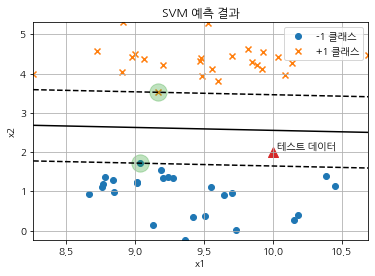

In [16]:
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1]+0.08, '테스트 데이터')

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.title("SVM 예측 결과")

plt.show()

In [17]:
x_new = [10, 2]
model.decision_function([x_new])

array([-0.61101582])

In [18]:
model.coef_.dot(x_new) + model.intercept_

array([-0.61101582])

In [19]:
# dual_coef_ = a_i * y_i
model.dual_coef_

array([[-0.60934379,  0.60934379]])

In [20]:
model.dual_coef_[0][0] * model.support_vectors_[0].dot(x_new) + \
    model.dual_coef_[0][1] * model.support_vectors_[1].dot(x_new) + \
    model.intercept_

array([-0.61101582])

## 연습문제 1
- 붓꽃 문제를 서포트 벡터 머신으로 풀어보자. 다음과 같은 데이터만 사용한 이진 분류 문제로 바꾸어 풀어본다. 위의 예제와 마찬가지로 커널 인수 kernel과 슬랙변수 가중치 인수 C는 각각 linear, 1e10으로 한다.

  1. 특징 변수를 꽃받침의 길이와 폭만 사용한다.
  2. 붓꽃 종을 Setosa와 Versicolour만 대상으로 한다.

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()
X1 = iris.data[:100, :2]
y1 = iris.target[:100]

In [22]:
from sklearn.svm import SVC
model1 = SVC(kernel='linear', C=1e10).fit(X1, y1)

from sklearn.metrics import classification_report
print(classification_report(y1, model1.predict(X1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



## 슬랙변수

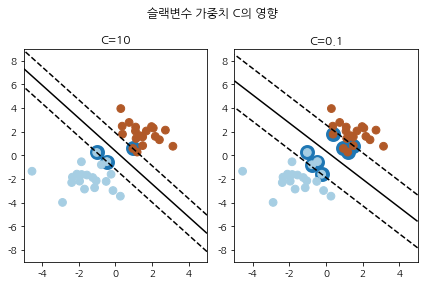

In [23]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

plotnum = 1
for name, penalty in (('C=10', 10), ('C=0.1', 0.1)):
    clf = SVC(kernel='linear', C=penalty).fit(X, Y)
    xx = np.linspace(-5, 5)

    x_jin = -5
    x_jax = 5
    y_jin = -9
    y_jax = 9
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]

    levels = [-1, 0, 1]
    linestyles = ['dashed', 'solid', 'dashed']
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    plt.subplot(1, 2, plotnum)
    plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired)
    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.title(name)

    plotnum += 1

plt.suptitle("슬랙변수 가중치 C의 영향")
plt.tight_layout()
plt.show()

## 얼굴 이미지 인식

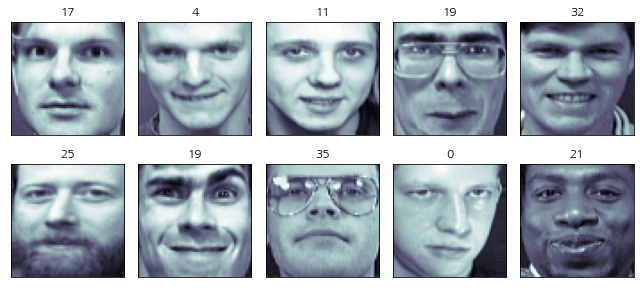

In [27]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(faces.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(faces.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
plt.tight_layout()
plt.show()

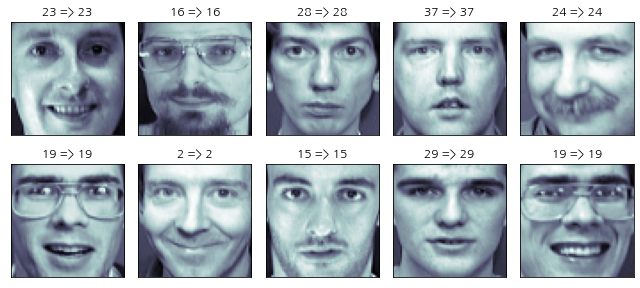

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.4, random_state=0)

from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train, y_train)

N = 2
M = 5
np.random.seed(4)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(y_test)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(X_test[k:(k + 1), :].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("%d => %d" %
                  (y_test[k], svc.predict(X_test[k:(k + 1), :])[0]))
plt.tight_layout()
plt.show()

In [29]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [30]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         8
          17       1.00    

In [31]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       0.50      1.00      0.67         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         5
           6       0.83      0.83      0.83         6
           7       1.00      0.67      0.80         3
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         4
          12       0.67      1.00      0.80         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         6
          15       1.00      0.33      0.50         6
          16       0.67      1.00      0.80         2
          17       1.00    